In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
data = pd.read_csv('fifa.csv')

In [5]:
data.shape

(128, 27)

In [6]:
numerical_features = data.select_dtypes(include = [np.number]).columns

In [7]:
categorical_features = data.select_dtypes(include = [np.object]).columns

In [9]:
data.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


[]

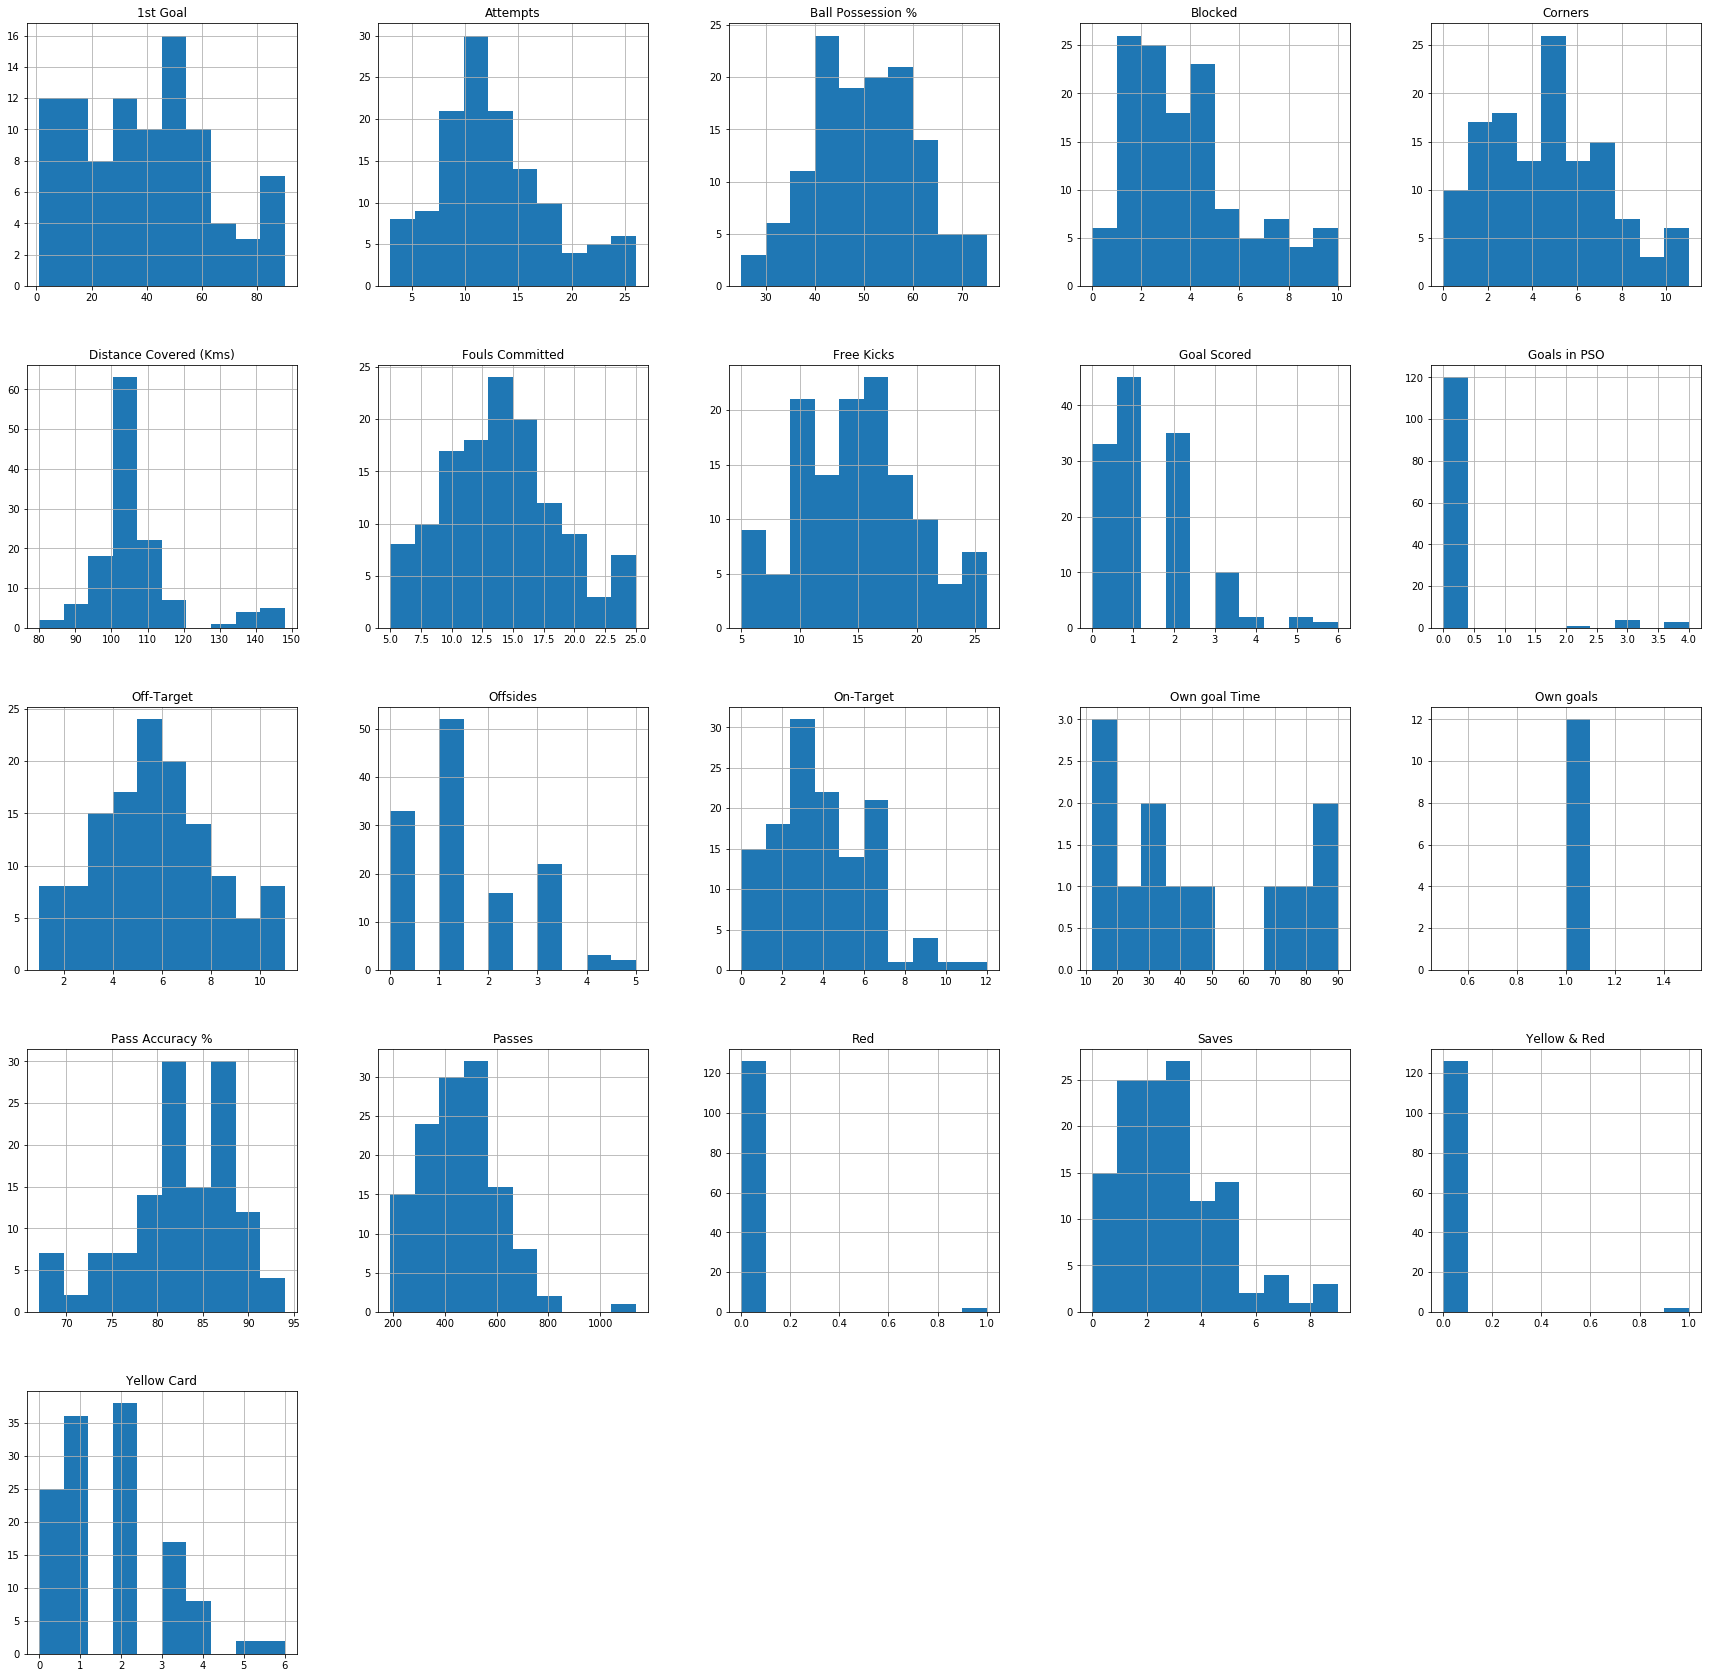

In [10]:
data.hist(figsize=(30,30))
plt.plot()

In [11]:
skew_values = skew(data[numerical_features], nan_policy = 'omit')
pd.concat([pd.DataFrame(list(numerical_features), columns = ['Features']),pd.DataFrame(list(skew_values),columns = ['Skewness degree'])],axis=1)

,Features,Skewness degree
0,Goal Scored,1.132232
1,Ball Possession %,0.002204
2,Attempts,0.645828
3,On-Target,0.792629
4,Off-Target,0.279919
5,Blocked,0.942771
6,Corners,0.302464
7,Offsides,0.819830
8,Free Kicks,0.098830
9,Saves,0.934101


In [12]:
missing_values = data.isnull().sum().sort_values(ascending = False)

In [14]:
perc_missing_values = (missing_values/len(data))*100

In [15]:
perc_missing_values

Own goal Time             90.6250
Own goals                 90.6250
1st Goal                  26.5625
Free Kicks                 0.0000
Team                       0.0000
Opponent                   0.0000
Goal Scored                0.0000
Ball Possession %          0.0000
Attempts                   0.0000
On-Target                  0.0000
Off-Target                 0.0000
Blocked                    0.0000
Corners                    0.0000
Offsides                   0.0000
Pass Accuracy %            0.0000
Saves                      0.0000
Passes                     0.0000
Distance Covered (Kms)     0.0000
Fouls Committed            0.0000
Yellow Card                0.0000
Yellow & Red               0.0000
Red                        0.0000
Man of the Match           0.0000
Round                      0.0000
PSO                        0.0000
Goals in PSO               0.0000
Date                       0.0000
dtype: float64

In [16]:
pd.concat([missing_values,perc_missing_values],axis = 1 , keys = ['Missing values','% Missing'])

,Missing values,% Missing
Own goal Time,116,90.6250
Own goals,116,90.6250
1st Goal,34,26.5625
Free Kicks,0,0.0000
Team,0,0.0000
Opponent,0,0.0000
Goal Scored,0,0.0000
Ball Possession %,0,0.0000
Attempts,0,0.0000
On-Target,0,0.0000


In [17]:
data

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,...,3,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,...,1,0,0,No,4.0,Group Stage,No,0,NaN,NaN
7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,5,...,1,0,0,Yes,24.0,Group Stage,No,0,NaN,NaN
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,...,1,0,0,Yes,58.0,Group Stage,No,0,NaN,NaN
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,...,3,0,0,No,62.0,Group Stage,No,0,1.0,81.0


In [18]:
data['Man of the Match'] = data['Man of the Match'].map({'Yes':1,'No':0})

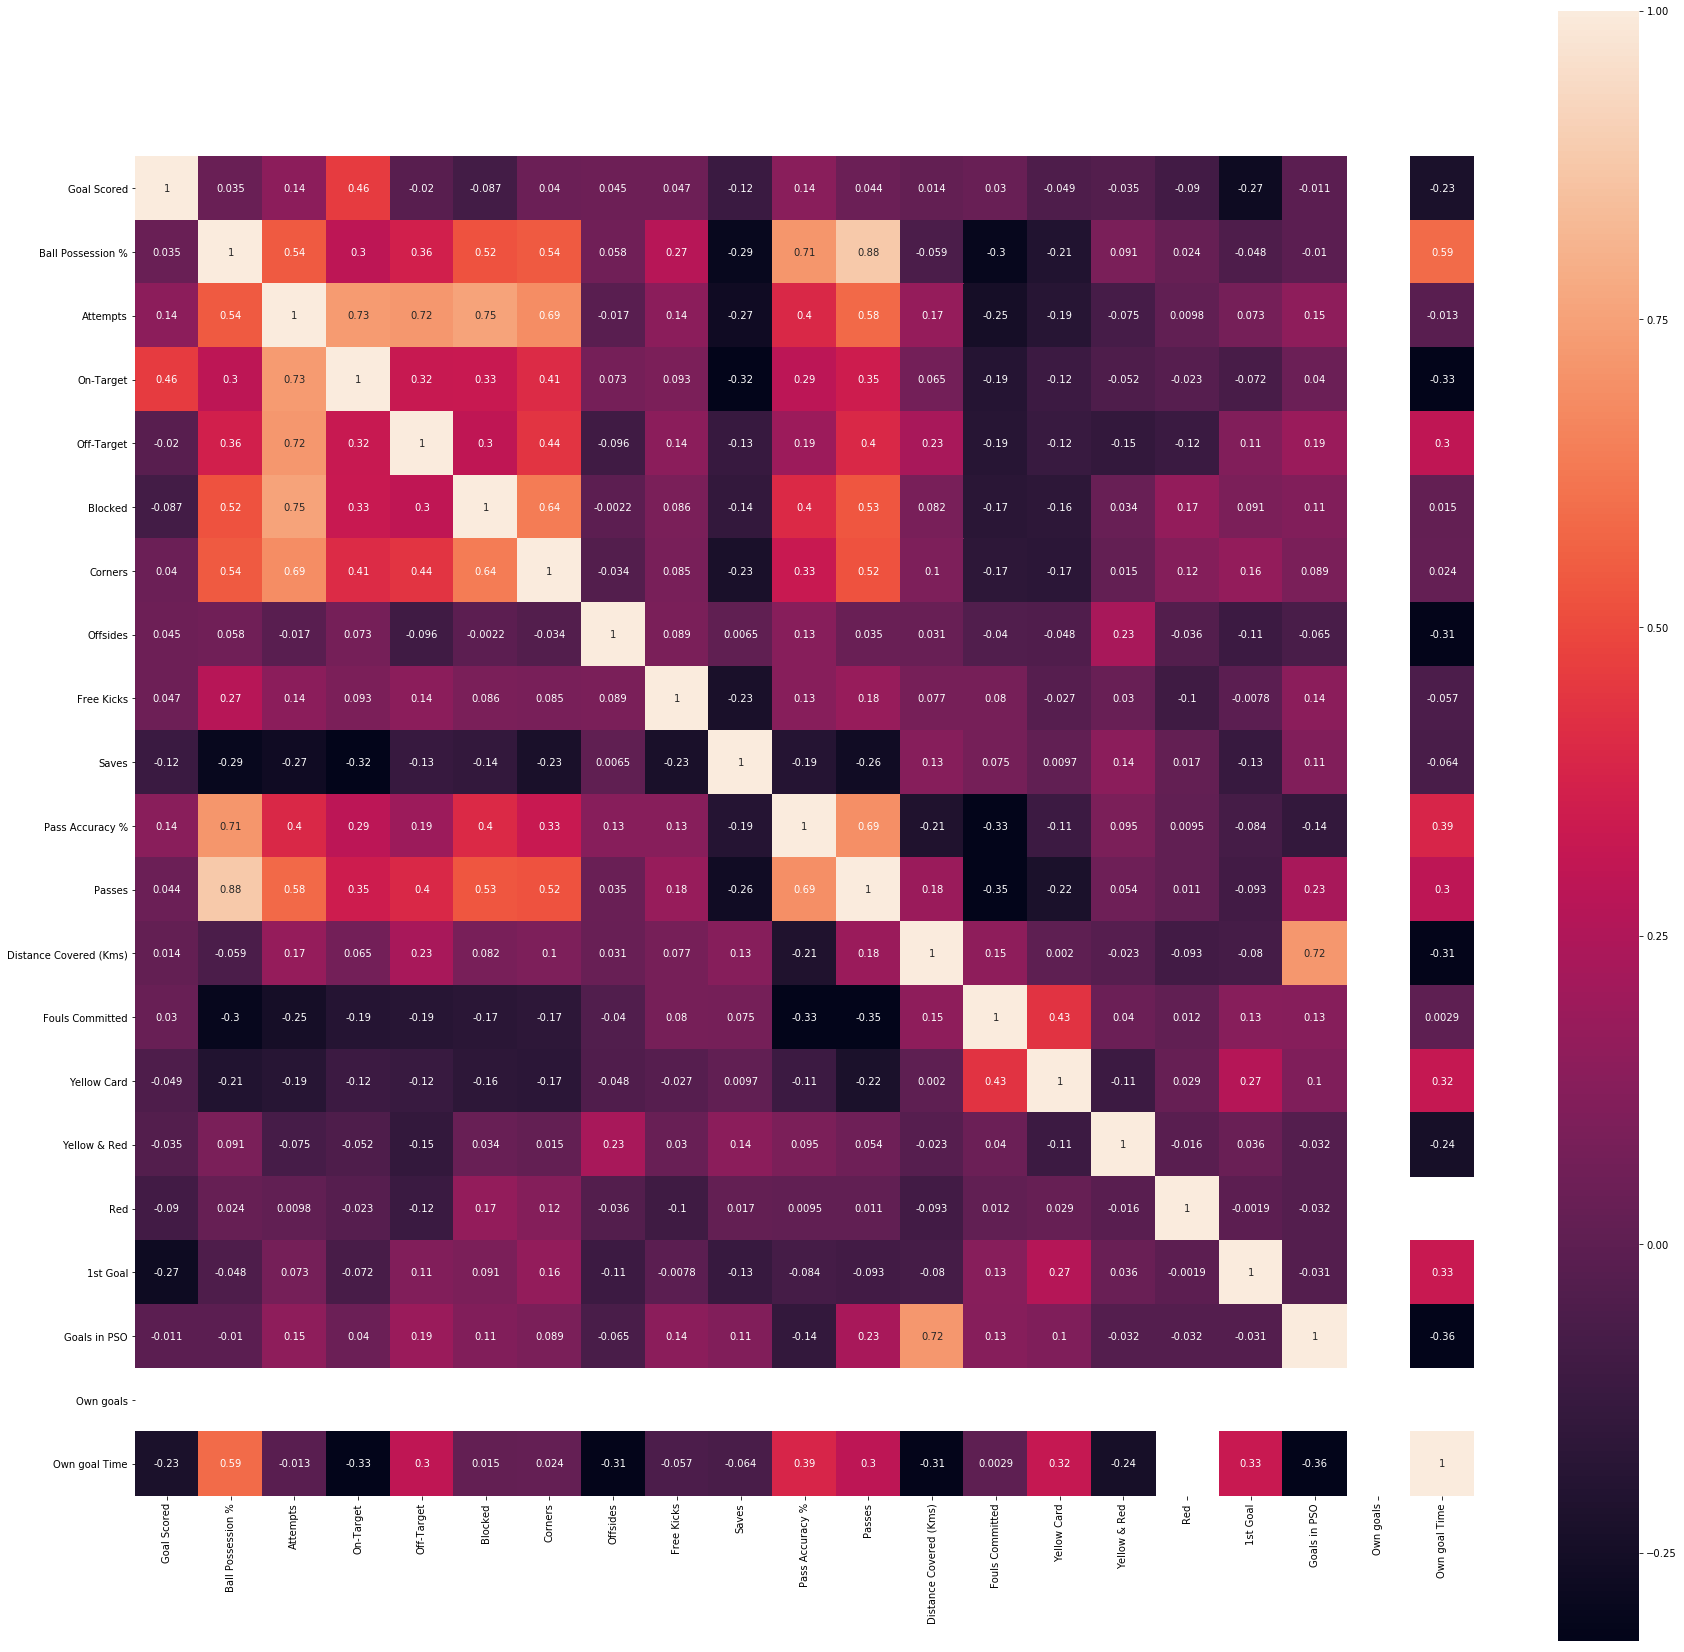

In [20]:
plt.figure(figsize=(30,30))
sns.heatmap(data[numerical_features].corr(),square = True, annot= True,robust = True, yticklabels = 1)

In [21]:
var = ['Man of the Match','Goal Scored','On-Target','Corners','Attempts','Free Kicks','Yellow Card','Red','Fouls Committed','Own goal Time']

In [22]:
corr = data.corr()

In [31]:
corr = corr.filter(items = ['Man of the Match']).sort_values(by =('Man of the Match'),ascending = False)

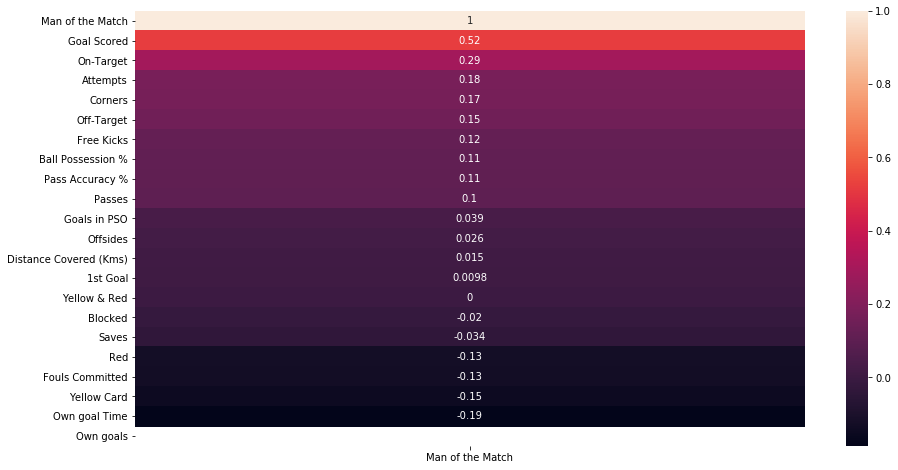

In [33]:
plt.figure(figsize = (15,8))
sns.heatmap(corr , annot=True)

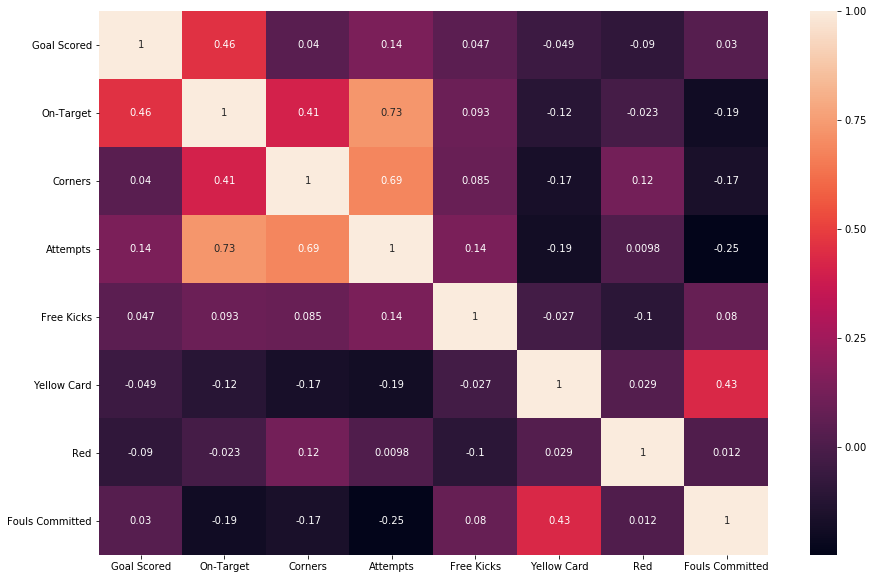

In [39]:
var = ['Goal Scored','On-Target','Corners','Attempts','Free Kicks','Yellow Card','Red','Fouls Committed']
plt.figure(figsize =(15,10))
sns.heatmap((data[var].corr()),annot=True)

In [40]:
var1 = var

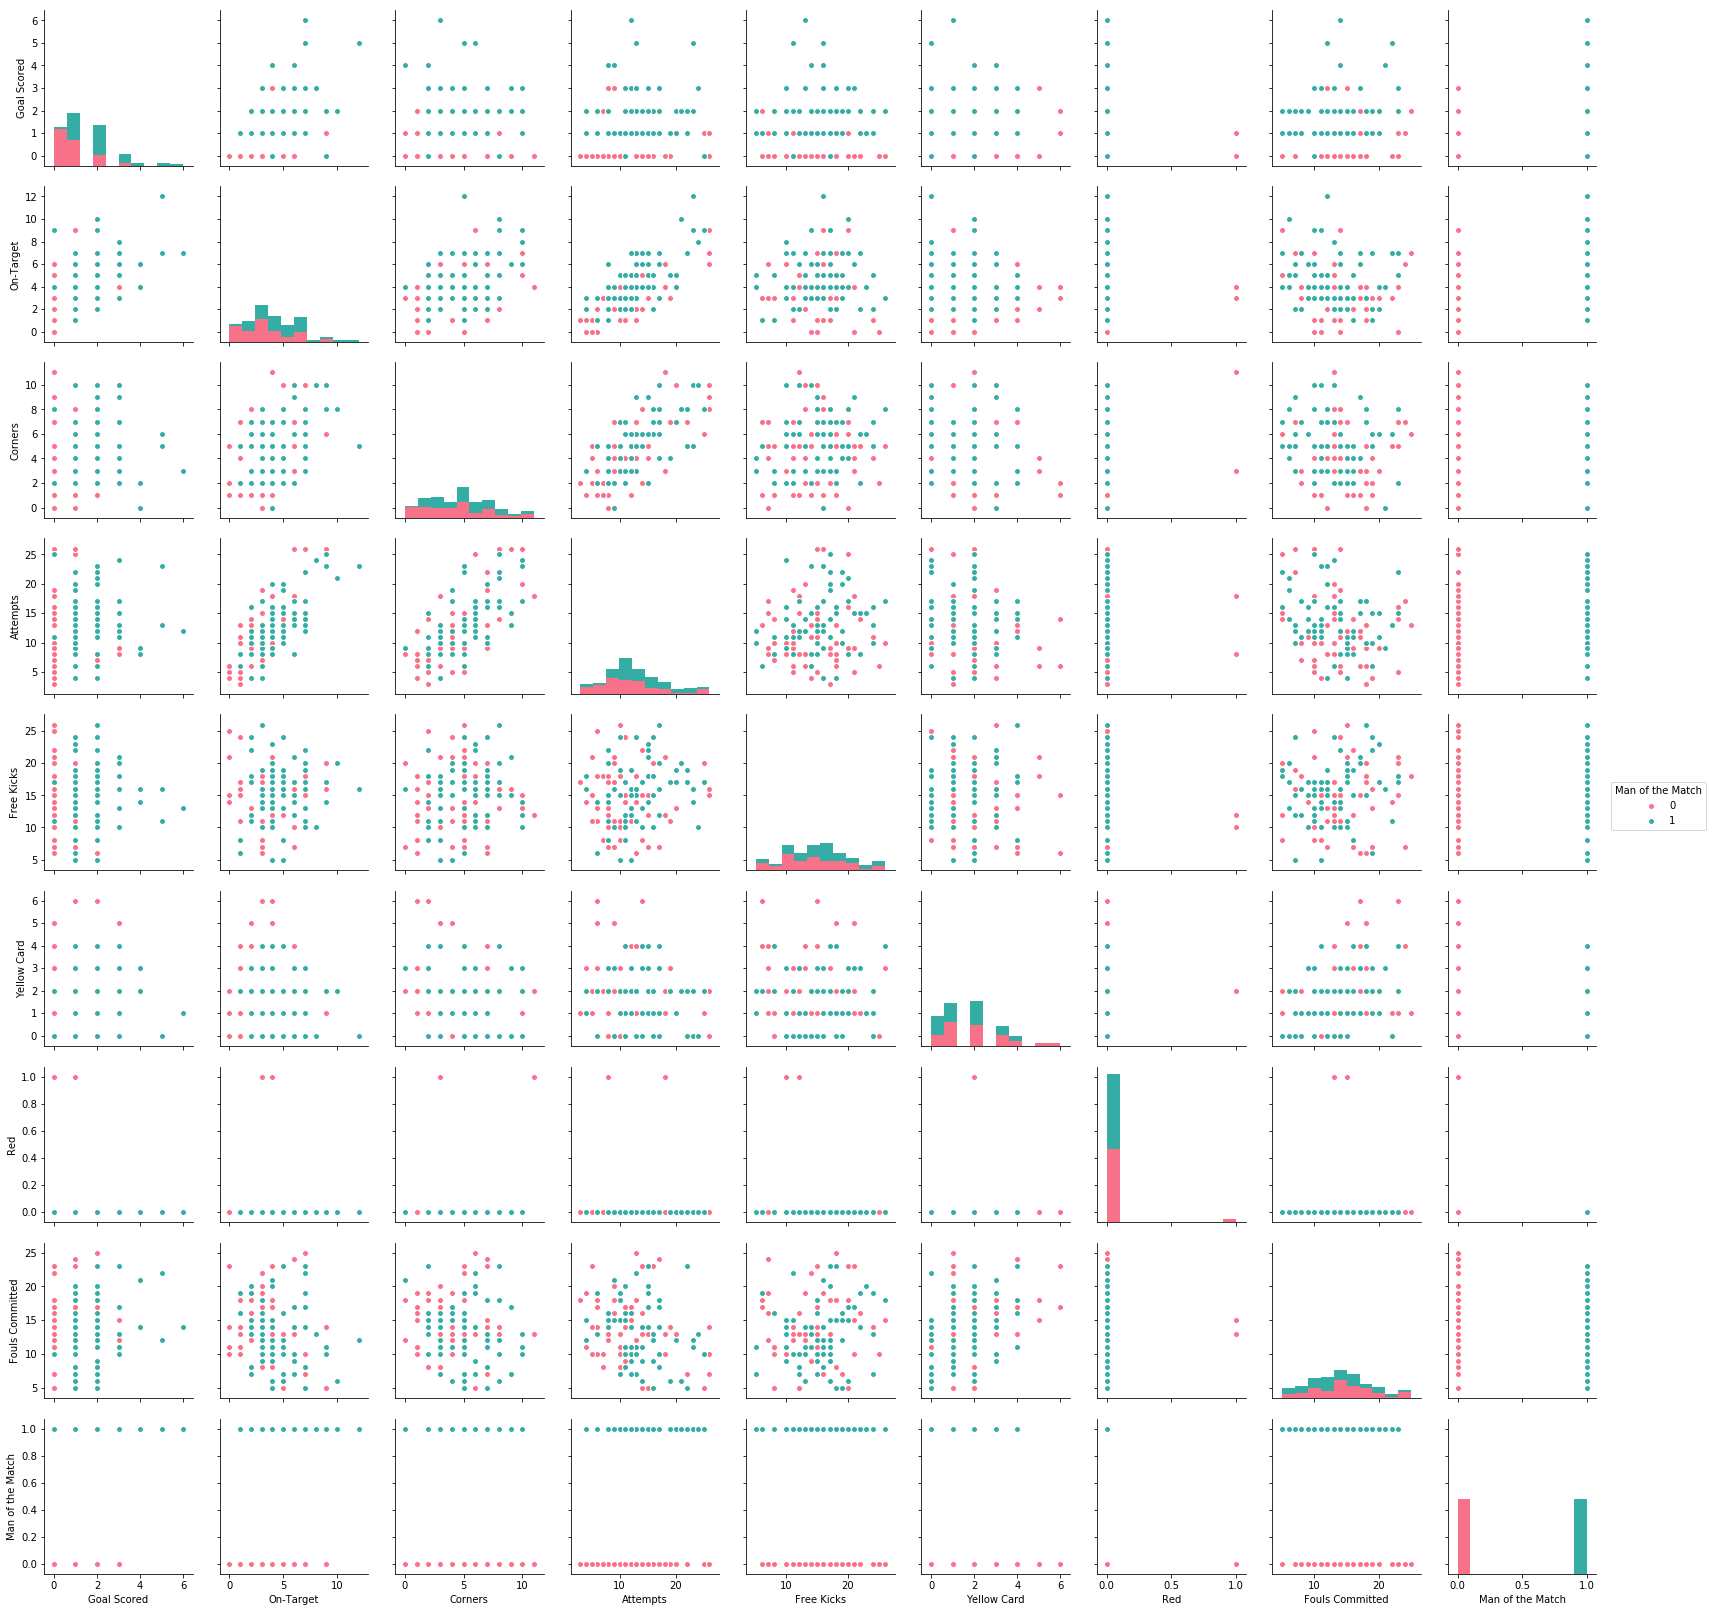

In [41]:
var1.append('Man of the Match')
sns.pairplot(data[var1],hue='Man of the Match',palette = 'husl')
plt.show()

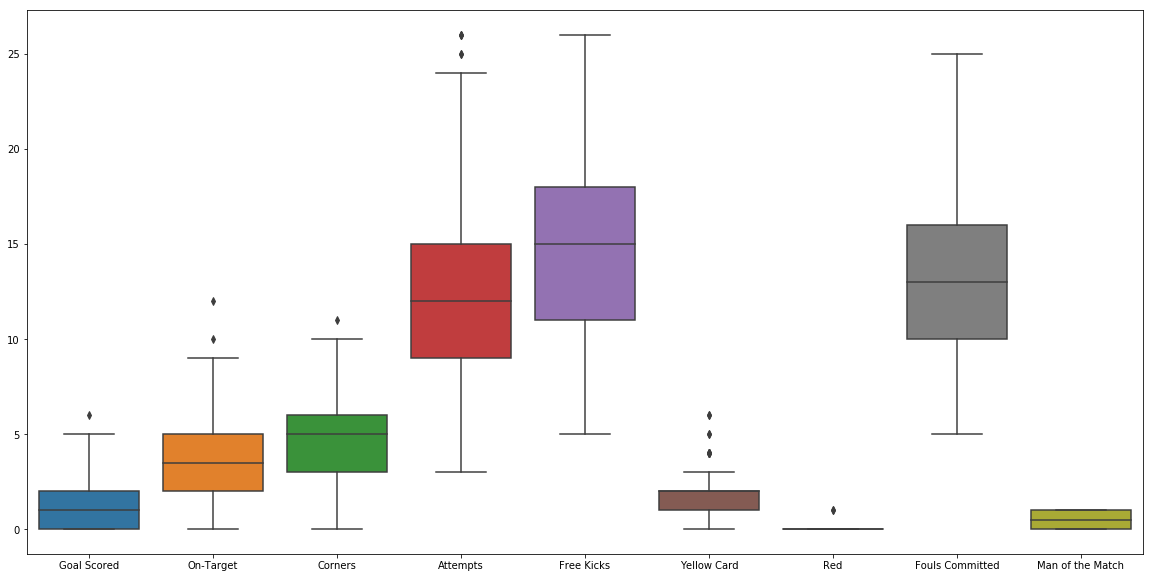

In [42]:
dummy_data = data[var1]
plt.figure(figsize = (20,10))
sns.boxplot(data = dummy_data)
plt.show()

In [43]:
data.drop(['Own goal Time','Own goals','1st Goal'],axis=1,inplace=True)

In [48]:
data.shape

(128, 24)

In [49]:
categorical_features

Index(['Date', 'Team', 'Opponent', 'Man of the Match', 'Round', 'PSO'], dtype='object')

In [72]:
def uniqueCategories(x):
    columns = list(x.columns).copy()
    for col in columns:
        print('Feature {} has {} unique values : {}'.format(col,len(x[col].unique()),x[col].unique()))
        print('\n')
uniqueCategories(data[categorical_features].drop('Date',axis=1))

Feature Team has 32 unique values : ['Russia' 'Saudi Arabia' 'Egypt' 'Uruguay' 'Morocco' 'Iran' 'Portugal'
 'Spain' 'France' 'Australia' 'Argentina' 'Iceland' 'Peru' 'Denmark'
 'Croatia' 'Nigeria' 'Costa Rica' 'Serbia' 'Germany' 'Mexico' 'Brazil'
 'Switzerland' 'Sweden' 'Korea Republic' 'Belgium' 'Panama' 'Tunisia'
 'England' 'Colombia' 'Japan' 'Poland' 'Senegal']


Feature Opponent has 32 unique values : ['Saudi Arabia' 'Russia' 'Uruguay' 'Egypt' 'Iran' 'Morocco' 'Spain'
 'Portugal' 'Australia' 'France' 'Iceland' 'Argentina' 'Denmark' 'Peru'
 'Nigeria' 'Croatia' 'Serbia' 'Costa Rica' 'Mexico' 'Germany' 'Switzerland'
 'Brazil' 'Korea Republic' 'Sweden' 'Panama' 'Belgium' 'England' 'Tunisia'
 'Japan' 'Colombia' 'Senegal' 'Poland']


Feature Man of the Match has 2 unique values : [1 0]


Feature Round has 6 unique values : ['Group Stage' 'Round of 16' 'Quarter Finals' 'Semi- Finals' '3rd Place'
 'Final']


Feature PSO has 2 unique values : ['No' 'Yes']




In [73]:
data.drop('Date',axis=1,inplace=True)

In [74]:
data2 = data.drop(['Corners','Fouls Committed','On-Target'],axis=1)
data3 = data.drop(['Fouls Committed'],axis=1)
data4 = data.drop(['Corners','Fouls Committed'],axis=1)

In [75]:
cleaned_data = pd.get_dummies(data)

In [78]:
cleaned_data

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Opponent_Tunisia,Opponent_Uruguay,Round_3rd Place,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_No,PSO_Yes
0,5,40,13,7,3,3,6,3,11,0,...,0,0,0,0,1,0,0,0,1,0
1,0,60,6,0,3,3,2,1,25,2,...,0,0,0,0,1,0,0,0,1,0
2,0,43,8,3,3,2,0,1,7,3,...,0,1,0,0,1,0,0,0,1,0
3,1,57,14,4,6,4,5,1,13,3,...,0,0,0,0,1,0,0,0,1,0
4,0,64,13,3,6,4,5,0,14,2,...,0,0,0,0,1,0,0,0,1,0
5,1,36,8,2,5,1,2,0,22,2,...,0,0,0,0,1,0,0,0,1,0
6,3,39,8,3,2,3,4,1,13,2,...,0,0,0,0,1,0,0,0,1,0
7,3,61,12,5,5,2,5,3,13,0,...,0,0,0,0,1,0,0,0,1,0
8,2,51,12,5,4,3,5,0,19,1,...,0,0,0,0,1,0,0,0,1,0
9,1,49,4,1,2,1,1,0,16,4,...,0,0,0,0,1,0,0,0,1,0


In [79]:
data

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,Round,PSO,Goals in PSO
0,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,306,118,22,0,0,0,1,Group Stage,No,0
1,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,511,105,10,0,0,0,0,Group Stage,No,0
2,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,395,112,12,2,0,0,0,Group Stage,No,0
3,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,589,111,6,0,0,0,1,Group Stage,No,0
4,Morocco,Iran,0,64,13,3,6,4,5,0,...,433,101,22,1,0,0,0,Group Stage,No,0
5,Iran,Morocco,1,36,8,2,5,1,2,0,...,194,100,14,3,0,0,1,Group Stage,No,0
6,Portugal,Spain,3,39,8,3,2,3,4,1,...,366,102,12,1,0,0,0,Group Stage,No,0
7,Spain,Portugal,3,61,12,5,5,2,5,3,...,727,103,10,1,0,0,1,Group Stage,No,0
8,France,Australia,2,51,12,5,4,3,5,0,...,484,103,16,1,0,0,1,Group Stage,No,0
9,Australia,France,1,49,4,1,2,1,1,0,...,390,111,19,3,0,0,0,Group Stage,No,0


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
y = cleaned_data['Man of the Match']

In [92]:
X = cleaned_data.drop('Man of the Match',axis=1)

In [95]:
X=X.values

In [98]:
y = y.values

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 0)

In [111]:
lr = LogisticRegression()

In [112]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
predict = lr.predict(X_test)

In [114]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.65      0.83      0.73        18
          1       0.81      0.62      0.70        21

avg / total       0.74      0.72      0.72        39



In [115]:
print(confusion_matrix(y_test,predict))

[[15  3]
 [ 8 13]]
